# Covariance and Correlation - Lab

## Introduction

In this lab, you will work towards calculating covariance and correlation for a given dataset in python. You'll use the formulas shown in previous lessons and verify our results with python libraries.

## Objectives

You will be able to:
* Calculate and interpret correlation and covariance for given variables
* Build density and scatter plots to visually identify the level of dependence between variables
* Compute covariance and correlation using numpy and pandas


## The Dataset

Included dataset (heightWeight.csv) includes 20 heights (in inches) and weights (in pounds). This small dataset will help us focus more on seeing covariance and correlation in action!

At this point, you should be able to calculate the average height and average weight. You can also explain the medians, variances and standard deviations for this dataset.

But all of those measurements are only concerned with a **single variable**. In this lab, you'll answer the following questions:

1. How does height interact with weight? 
2. Does weight increase as height increases?
3. Are weight and height not related at all?

There are always exceptions, but when you look at the population in general, taller people will tend to weigh more than shorter people. While you should *always* be cautious when generalizing, generalization of information can be very useful as it shows you a bigger picture that you can build your intuitions upon. This is also what a lot of core statistical principles are built upon.


First, let's load this dataset in python using pandas. Next, print the length of the data, the head of the data, and the basic statistics of the data.

In [8]:
# Load the dataset into pandas and perform basic inspection
import pandas as pd
data = pd.read_csv('heightWeight.csv')

print (len(data))

print(data.head())

print (data.describe())


# 20
#    height  weight
# 0      68     165
# 1      71     201
# 2      61     140
# 3      69     170
# 4      71     192
#           height      weight
# count  20.000000   20.000000
# mean   66.850000  165.800000
# std     5.112163   28.971129
# min    58.000000  115.000000
# 25%    63.250000  143.750000
# 50%    68.500000  170.000000
# 75%    71.000000  192.750000
# max    74.000000  210.000000

20
   height  weight
0      68     165
1      71     201
2      61     140
3      69     170
4      71     192
          height      weight
count  20.000000   20.000000
mean   66.850000  165.800000
std     5.112163   28.971129
min    58.000000  115.000000
25%    63.250000  143.750000
50%    68.500000  170.000000
75%    71.000000  192.750000
max    74.000000  210.000000


## Calculating the Covariance 

Here's the covariance formula once again. 

$$cov(x,y) = \frac{1}{n-1}\displaystyle\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)$$

Note that we divide by $(n-1)$ here, because of the assumption that this particular data is a _sample of a bigger population_. The bigger population here could be the entire world population. When working with populations. The general rule is to divide by $n$. When working with a sample, you should divide by $n-1$. In practice, however, you'll see the two formulas are often being used interchangeably. 

### Mean Normalization 

Looking at the formula of covariance, you'll notice that it is composed out of $(x_i -\bar x)$ and $(y_i -\bar y)$. These are also known as the **mean normalized** variables $x$ and $y$. The idea is that you take each element in $x$ and $y$ and respectively subtract the mean of $x$ and $y$. The result is that your "altered" x and y now have mean 0.

So how do you do  this? You can write a function that takes in a vector, calculates the mean of this vector and subtracts the calculated mean value from each element to calculate $(x_i -\bar x)$ and  $(y_i -\bar y)$ . 

*Hint*: you can use `np.mean()` to calculate the mean for above formula.

In [16]:
import numpy as np

# Write a function to take in an iterable, calculate the mean and subtract the mean value
# from each element , creating and returning a new list. 

def mean_normalize(var):

    norm = [] # Vector for storing output values 
    n = 0     # a counter to identify the position of next element in vector
    mean = np.mean(var)
    
    # for each element in the vector, subtract from mean and add the result to norm
    for i in var:
        diff = var[n] - mean
        norm.append(diff)
        n = n + 1
    
    return norm

mean_normalize([1,2,3,4,5]), mean_normalize([11,22,33,44,55])

# ([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

([-2.0, -1.0, 0.0, 1.0, 2.0], [-22.0, -11.0, 0.0, 11.0, 22.0])

Great! You'll see that our function maintains the _variance_ of list elements and moves the mean to zero. As a quick test, you can visualize what exactly happens to the data with mean normalization. 

Use seaborn to plot the height variable distribution before and after the normalization process. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


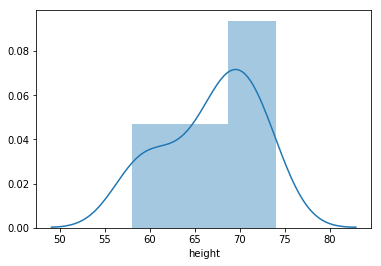

In [11]:
# Visualize the height data distribution before and after mean normalization 
height = mean_normalize(data.height)
import seaborn as sns
sns.distplot(data.height);

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


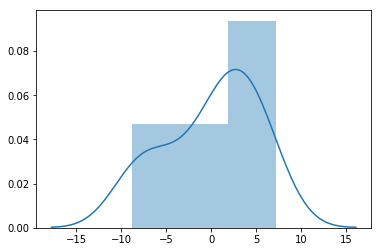

In [12]:
sns.distplot(height);

There you go! The _shape_ of the data isn't changed, but the mean is just shifted! You can also try this for the weight variable.

### The Dot Product
Now that you have normalized the variables height and weight, you have to go ahead and take the _dot product_ of these two normalized variables.

> A dot product is a linear algebraic operation that takes two equal-length sequences of numbers and returns a single number which can be used as a measure of similarity between these sequences (also known as vectors).

[Here is a great article explaining this in detail](https://betterexplained.com/articles/vector-calculus-understanding-the-dot-product/).

For two vectors a and b, a dot product is calculated by multiplying each element of one vector to its counterpart in the second, and then adding them up together. Imagine you want to take the dot product of two variables `a` and `b`:

```
 a[0] * b[0] + a[1] * b[1] + a[2] * b[2] ...

```

Let's write a function that takes two iterables and return their dot product. 

In [15]:
# Write a function to calculate the dot product of two iterables 


def dot_product(x,y):
    n = 0  # a counter pointing to the current element of vector(s)
    prod_vec = [] # Initliaze an empty list to store the results 
    
    # For all elements in the vectors, multiply and save results in prod_vec
    for i in range(len(x)):
        prod = x[i]* y[i]
        prod_vec.append(prod)
        n += 1
        
    dot_prod = np.sum(prod_vec)
    return dot_prod


a = [1,2,3]
b = [4,5,6]

dot_product(a,b)

#  32  calculated as (1*4 + 2*5 + 3*6)

32

Now that you have the numerator of the formula sorted out, let's finally write a function `covariance()` that takes the height and weight lists created earlier and returns the covariance value using the functions you created earlier. 

In [1]:
# Calculate covariance using functions above

def covariance(var1, var2):
def mean_normalize(var):

    norm = [] # Vector for storing output values 
    n = 0     # a counter to identify the position of next element in vector
    mean = np.mean(var)
    
    # for each element in the vector, subtract from mean and add the result to norm
    for i in var:
        diff = var[n] - mean
        norm.append(diff)
        n = n + 1
    
    return norm


def covariance(var1, var2):

    # Formula for covariance is:
    # [Sum (x_i - X)(y_i - Y)] / N-1 
    
    # Sanity Check : Check to see if both vectors are of same length
    # Exit the function if variables have different lengths

    if len(var1) != len(var2):
        return None 
    else: 
       
        # Mean normalize both variables 
        x = mean_normalize(var1)
        y = mean_normalize(var2)
        
        # Take the dot product of mean normalized variables
        result = dot_product(x,y)

        # divide the dot product by n-1    
        return result /((len(var1)) -1)

covariance(data['height'], data['weight'])

# Uncomment below to check your function

# covariance(data['height'], data['weight'])

# 144.75789473684208

Now verify your results with pandas built in `DataFrame.cov()` method.

In [31]:
# uncomment to run
# data.cov()

,height,Weight
height,26.134211,144.757895
Weight,144.757895,839.326316


You'll notice that you don't just get one value but four. It's important to know that covariances (as well as correlations) are often shown in matrix form. The covariance between height and weight is exactly what we calculated. The matrix also shows the covariance of a variable with itself on the diagonal. The off-diagonal values show the covariance value (which is the same value twice: the covariance between weight and height is the same as the covariance between height and weight). 

Remember that covariance is a metric that is hard to interpret. Let's dig a little deeper by visualizing height and weight on a scatter plot! 

In [ ]:
# Plot a scatter graph between height and weight to visually inspect the relationship 

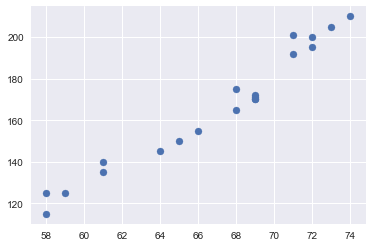

So we can see there is quite a bit of positive relationship between the two, but a covariance value is a bit hard to interpret. So let's try calculating correlation. 

## Calculating the Correlation

Once again, here's the formula to calculate the correlation. 
$$ r = \frac{\sum_{i=1}^{n}(x_i -\bar x)(y_i - \bar y)} {\sqrt{\sum_{i=1}^{n}(x_i - \bar x)^2 \sum_{i=1}^{n}(y_i-\bar y)^2}}$$
There are a lot of mean normalizations going on here. Try to use all the above to create a new function `correlation()`, and use the function to create a correlation between weight and height.

In [7]:
# Calculate Correlation between two variables using formula above
import math
def correlation(var1,var2):
    
    pass

# correlation(data['height'], data['weight'])

# 0.98

A correlation of .98, that's very close to 1! That means that there is clearly a strong relationship between height and weight. At least, for this particular sample!  And there is a takeaway in this. sample size plays a major rule in determining the nature of a variable and its relationship with other variables. The set of 20 records we have seem to correlate highly, but if you look at 20 other people, you'll see that this result will be different. The correlation here will depend on the _sample_, and you'll see that this will differ more clearly when working with smaller samples.

As a last check, let's use pandas `DataFrame.corr()` method to see how that works. 

In [42]:
# uncomment to run
# data.corr()

,height,Weight
height,1.0000,0.9774
Weight,0.9774,1.0000


This method returns another matrix. You can see that a correlation of a variable with itself is always equal to 1. The correlation between height and weight can be rounded off to our results. Great! Now you know how this works. 

## Summary 

In this lab you learned how to calculate the covariance and correlation between variables. You also looked at mean normalization and dot products. Finally, you learned how to calculate these measures using pandas built-in methods. 